# Lab - Logistic Regression

## Logistic Regression from scratch

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

Dataset **Titanic**

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')

# Data manipulation
titanic.fillna(titanic['Age'].mean(), inplace=True)
titanic.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,FamilySize
0,0,3,0,22.0,2
1,1,1,1,38.0,2
2,1,3,1,26.0,1
3,1,1,1,35.0,2
4,0,3,0,35.0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = titanic[titanic.columns[~titanic.columns.isin(['Survived'])]].values
y = titanic[['Survived']].values


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (712, 4) (712, 1)
Test set: (179, 4) (179, 1)


### Scikit-learn Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X_train, y_train)
train_predictions_label = lg.predict(X_train)
train_predictions_proba = lg.predict_proba(X_train)
test_predictions_label = lg.predict(X_test)
test_predictions_proba = lg.predict_proba(X_test)


In [ ]:
test_predictions_label[:5]

array([1, 1, 1, 1, 0])

In [ ]:
test_predictions_proba[:5]

array([[0.11821434, 0.88178566],
       [0.07056997, 0.92943003],
       [0.39505241, 0.60494759],
       [0.24810099, 0.75189901],
       [0.79814993, 0.20185007]])

In [ ]:

# Show metrics
print("Accuracy score on train set: %f" % accuracy_score(y_train, train_predictions_label))
print("Accuracy score on test set: %f" % accuracy_score(y_test, test_predictions_label))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions_label))
print(classification_report(y_test, test_predictions_label))
print('-----------')
print('Log loss on train set:', log_loss(y_train, train_predictions_proba))
print('Log loss on test set:', log_loss(y_test, test_predictions_proba))
# Show parameters
print('w = ', lg.coef_)
print('b = ', lg.intercept_)

Accuracy score on train set: 0.799157
Accuracy score on test set: 0.793296
Confusion Matrix:
[[97 17]
 [20 45]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.73      0.69      0.71        65

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

-----------
Log loss on train set: 0.4452845704337929
Log loss on test set: 0.4466709454181867
w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
b =  [2.84100084]


### Handmade Logistic Regression

**Forward Propagation:**
$$Z = Xw + b$$
$$\hat{y} = \sigma(Z) =\sigma(Xw + b) $$
$$J(w, b) = -\frac{1}{m}\sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)} \tag{5}$$

**and Backward**

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(\hat{y}-y)\tag{6}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})\tag{7}$$

In [ ]:
# Initialize params
def initialize_params(X):
    '''Initialize w, b with zeros and return'''
    s = X.shape[1]
    w = np.zeros((s,1), dtype=float)
    b = np.zeros((1,1), dtype=float)
    return w, b

In [ ]:
# Implement sigmoid
def sigmoid(Z):
    y = 1/(1 + np.exp(-Z))
    return y

In [ ]:
# Forward propagation
def forward(w, b, X):
    '''Return y_hat'''

    y_hat = sigmoid(X@w + b)
    return y_hat

In [ ]:
# Binary cross entropy loss
# m, n = X.shape
def binary_cross_entropy(y, y_hat):
    '''Calculate loss function J and return'''
    
    J = (-1*(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))).mean()
    return J

In [ ]:
# Backward propagation
def backward(X, y, y_hat): #, w, b
    '''Calculate dw, db and return'''
    m = X.shape[0]
    dw = (X.T@ (y_hat - y))/m
    db = (y_hat-y).mean() #db = (1/m)*np.sum(y_hat-y, keepdims=True)
    return dw, db

# Update parameters
def update_params(w, b, dw, db, learning_rate):
    '''Update w, b and return'''
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w, b

In [ ]:
# Training process
def train(X, y, iterations, learning_rate):
    
    history = {'train_loss': [],
               'test_loss': []}


    w, b = initialize_params(X)

    for i in range(iterations):
        # Similary to Linear Regression lab, you need to perform all 4 steps of training per iteration
        # Note: As we use train and validation set, let's calculate train loss and test loss at every iteration
        # then save it to history dictionary defined above
        # Your progress now should look like this
        # train => train loss => save train loss => test loss => save test loss => backward => params update
        
        y_hat = forward(w, b, X)
        J = binary_cross_entropy(y, y_hat)
        history['train_loss'].append(J) 
        #update parameters
        
        
        y_hat_test = forward(w, b, X_test)
        test_loss = binary_cross_entropy(y_test, y_hat_test)
        history['test_loss'].append(test_loss)
        
        dw, db = backward(X, y, y_hat)
        w, b = update_params(w, b, dw, db, learning_rate)
#test every 1000 iters
        if i%100:
            print(f'Step {i}, train_loss {J}, test_loss {test_loss}')
    return w, b, history

In [ ]:
# Predict
def predict(w, b, X):
    '''Return predicted y of X. 
    Note that you will return the label (class), not the probability
    '''
    y_hat = forward(w, b, X)
    # return np.round(y_hat)
    return (y_hat>=0.5).astype(int)

In [ ]:
# if y_hat >= 0.5:
#     return y_hat.astype(int)
# return (y_hat>=0.5).astype(int)

**Evaluation**

In [ ]:
predictions.shape

(179, 1)

In [ ]:
# Train the model and predict X_test
w, b, history = train(X_train, y_train, iterations=20000, learning_rate=5e-3)
predictions = predict(w, b, X_test) # label

Streaming output truncated to the last 5000 lines.
Step 14950, train_loss 0.4554115665563523, test_loss 0.44267298995053633
Step 14951, train_loss 0.4554108109664653, test_loss 0.44267241782370365
Step 14952, train_loss 0.4554100554677923, test_loss 0.4426718458152502
Step 14953, train_loss 0.4554093000603116, test_loss 0.4426712739251485
Step 14954, train_loss 0.4554085447440021, test_loss 0.44267070215337073
Step 14955, train_loss 0.455407789518842, test_loss 0.44267013049988907
Step 14956, train_loss 0.45540703438480995, test_loss 0.4426695589646757
Step 14957, train_loss 0.45540627934188455, test_loss 0.44266898754770323
Step 14958, train_loss 0.4554055243900443, test_loss 0.44266841624894365
Step 14959, train_loss 0.4554047695292679, test_loss 0.44266784506836937
Step 14960, train_loss 0.4554040147595337, test_loss 0.44266727400595274
Step 14961, train_loss 0.45540326008082044, test_loss 0.44266670306166594
Step 14962, train_loss 0.45540250549310674, test_loss 0.4426661322354815
S

In [ ]:
# Evaluation
print("Accuracy score on test set: %f" % accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Show parameters
print('w = ', w)
print('b = ', b)

Accuracy score on test set: 0.815642
Confusion Matrix:
[[101  13]
 [ 20  45]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.78      0.69      0.73        65

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
b =  [2.84100084]


In [ ]:
# Accuracy score on train set: 0.799157
# Accuracy score on test set: 0.793296
# Confusion Matrix:
# [[97 17]
#  [20 45]]
#               precision    recall  f1-score   support

#            0       0.83      0.85      0.84       114
#            1       0.73      0.69      0.71        65

#     accuracy                           0.79       179
#    macro avg       0.78      0.77      0.77       179
# weighted avg       0.79      0.79      0.79       179

# -----------
# Log loss on train set: 0.4452845704337929
# Log loss on test set: 0.4466709454181867
# w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
# b =  [2.84100084]

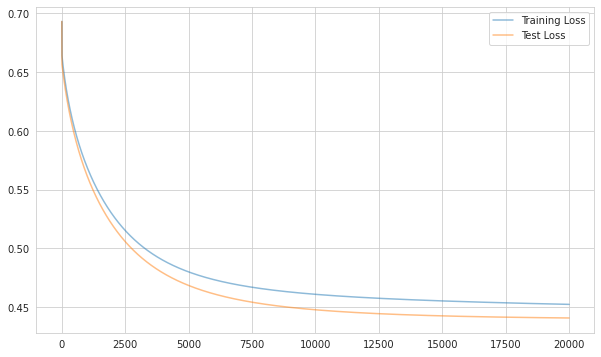

In [ ]:
# If you do everything correctly, you can plot train and test loss to see the learning curve
# Yours should look something like this
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss', alpha=0.5)
plt.plot(history['test_loss'], label='Test Loss', alpha=0.5)
plt.legend()
plt.show()

**Well done!**

![](https://www.researchgate.net/profile/Hayder_Al-Behadili/publication/325999203/figure/fig4/AS:641844216074241@1530038994324/Overfitting-and-underfitting-effect-on-error.png)